### Importación de datos



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


# 1. Análisis de facturación



In [2]:
facturacion = {
    "Tienda 1": tienda1["Precio"].sum(),
    "Tienda 2": tienda2["Precio"].sum(),
    "Tienda 3": tienda3["Precio"].sum(),
    "Tienda 4": tienda4["Precio"].sum()
}

facturacion_df = pd.Series(facturacion).sort_values(ascending=False)
print("\nFacturación total por tienda (COP):\n")
print(facturacion_df.apply(lambda x: f"${x:,.0f}"))


Facturación total por tienda (COP):

Tienda 1    $1,150,880,400
Tienda 2    $1,116,343,500
Tienda 3    $1,098,019,600
Tienda 4    $1,038,375,700
dtype: object


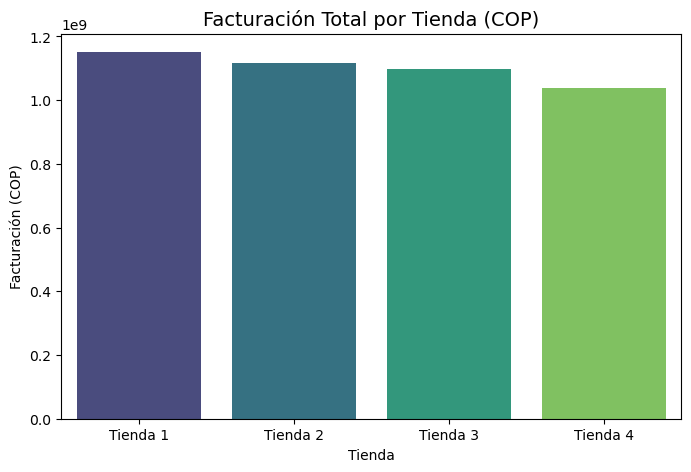

In [3]:
plt.figure(figsize=(8,5))
sns.barplot(x=facturacion_df.index, y=facturacion_df.values,hue=facturacion_df.index, palette="viridis",legend=False)
plt.title("Facturación Total por Tienda (COP)", fontsize=14)
plt.ylabel("Facturación (COP)")
plt.xlabel("Tienda")
plt.xticks(rotation=0)
plt.show()

# 2. Ventas por categoría

In [4]:
ventas_categoria_t1 = tienda1["Categoría del Producto"].value_counts()
print("\nVentas por categoría - Tienda 1:\n")
print(ventas_categoria_t1)


Ventas por categoría - Tienda 1:

Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64


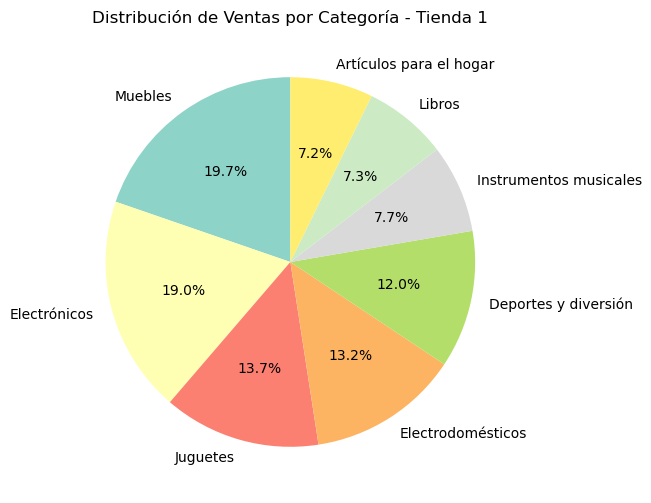

In [5]:
plt.figure(figsize=(6,6))
ventas_categoria_t1.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap="Set3")
plt.title("Distribución de Ventas por Categoría - Tienda 1")
plt.ylabel("")
plt.show()

# 3. Calificación promedio de la tienda


In [6]:
valoracion = {
    "Tienda 1": tienda1["Calificación"].mean(),
    "Tienda 2": tienda2["Calificación"].mean(),
    "Tienda 3": tienda3["Calificación"].mean(),
    "Tienda 4": tienda4["Calificación"].mean()
}

valoracion_df = pd.Series(valoracion).sort_values(ascending=False)
print("\nValoración promedio por tienda:\n")
print(valoracion_df.round(2))


Valoración promedio por tienda:

Tienda 3    4.05
Tienda 2    4.04
Tienda 4    4.00
Tienda 1    3.98
dtype: float64


# 4. Productos más y menos vendidos

In [7]:
top5_t1 = tienda1["Producto"].value_counts().head(5)
bottom5_t1 = tienda1["Producto"].value_counts().tail(5)

print("\nTop 5 productos más vendidos - Tienda 1:\n", top5_t1)
print("\nBottom 5 productos menos vendidos - Tienda 1:\n", bottom5_t1)


Top 5 productos más vendidos - Tienda 1:
 Producto
Microondas          60
TV LED UHD 4K       60
Armario             60
Secadora de ropa    58
Mesa de noche       56
Name: count, dtype: int64

Bottom 5 productos menos vendidos - Tienda 1:
 Producto
Ciencia de datos con Python    39
Pandereta                      36
Olla de presión                35
Auriculares con micrófono      33
Celular ABXY                   33
Name: count, dtype: int64


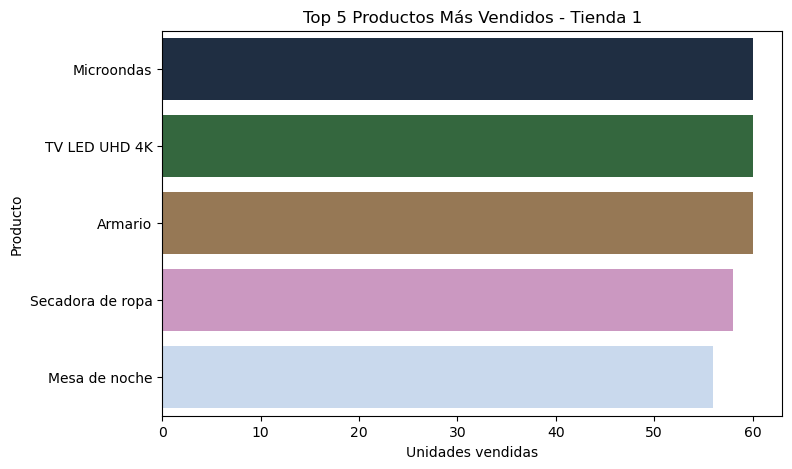

In [8]:
plt.figure(figsize=(8,5))
sns.barplot(x=top5_t1.values, y=top5_t1.index,hue=top5_t1.index, palette="cubehelix",legend=False)
plt.title("Top 5 Productos Más Vendidos - Tienda 1")
plt.xlabel("Unidades vendidas")
plt.ylabel("Producto")
plt.show()

# 5. Envío promedio por tienda

In [9]:
envio_promedio = {
    "Tienda 1": tienda1["Costo de envío"].mean(),
    "Tienda 2": tienda2["Costo de envío"].mean(),
    "Tienda 3": tienda3["Costo de envío"].mean(),
    "Tienda 4": tienda4["Costo de envío"].mean()
}

envio_promedio_df = pd.Series(envio_promedio).sort_values()
print("\nCosto de envío promedio por tienda (COP):\n")
print(envio_promedio_df.apply(lambda x: f"${x:,.0f}"))


Costo de envío promedio por tienda (COP):

Tienda 4    $23,459
Tienda 3    $24,806
Tienda 2    $25,216
Tienda 1    $26,019
dtype: object


# Informe Final - Análisis de Tiendas Alura Store
## 1. Facturación

La Tienda 1 lidera la facturación con 1,150,880,400COP, **Seguida por la tienda2 y tienda3** la tienda4 presenta la facturación más baja con 1,038,375,700COP

## 3. Valoración de Clientes

La mejor calificación la tiene la Tienda 3 (4.05), seguida por la Tienda 2 (4.04). La Tienda 1 tiene la calificación más baja (3.98), aunque las diferencias son pequeñas.

## 5. Costos de Envío

La Tienda 4 presenta el costo de envío promedio más alto ($23,459 COP), lo que podría afectar la satisfacción del cliente y la competitividad.

## 7. Conclusión y Recomendación

Si el Sr. Juan busca vender la tienda menos eficiente, la Tienda 4 sería la candidata más lógica:

Facturación más baja.
Costo de envío más alto.
Calificación promedio intermedia.
No destaca en categorías ni en volumen de ventas.